# <img src="logo.png" alt="Logo UNI" width=200 height=200 align="right">

<br><br><br>

<h1 style="color:#1D65DD; font-size: 36px;">Fundamentos de Programación </h1>
<h2 style="color:#1D65DD; font-size: 42px;">VENTAS DE JUGUETES</h2>

<br>
<div style="text-align: left">
    <h3>Integrantes:</h3>
    <ul style="list-style-type:none; text-align: left;">
        <li>1. Rydell Jonel Mosquera Huayhua - Código: 20232690K</li>
    </ul>
</div>

<br><br>

<h2 style="color:#1D65DD; font-size: 30px;">Contenido del Análisis:</h2>
<ol style="font-size: 18px;">
    <li><a href="#ventas-region">Ventas por Región</a></li>
    <li><a href="#ventas-producto">Ventas por Producto</a></li>
    <li><a href="#producto-mas-vendido">Producto Más y Menos Vendido</a></li>
    <li><a href="#porcentaje-productos">Porcentaje de Ventas por Producto</a></li>
    <li><a href="#ventas-mes">Ventas por Mes</a></li>
    <li><a href="#grafico-ventas-mensuales">Gráfico de Ventas Mensuales</a></li>
    <li><a href="#promedio-ventas-producto">Promedio de Ventas por Producto</a></li>
    <li><a href="#desviacion-ventas-region">Desviación Estándar de Ventas por Región</a></li>
    <li><a href="#ventas-acumuladas">Ventas Acumuladas por Mes</a></li>
    <li><a href="#ventas-promedio-region">Ventas Promedio por Región</a></li>
    <li><a href="#analisis-ventas-producto-region">Análisis de Ventas por Producto y Región</a></li>
    <li><a href="#tendencia-precios-mes">Tendencia de Precios por Mes</a></li>
    <li><a href="#distribucion-ventas-precio">Distribución de Ventas por Rango de Precio</a></li>
</ol>



In [17]:
import pandas as pd

import matplotlib.pyplot as plt


<a id="cargar-datos"></a>
## Carga de Datos
Cargamos el archivo CSV que contiene la información de las ventas de juguetes.


In [2]:
df = pd.read_csv('/home/ananau/Documentos/CODE/python/PC5/juguetes_ventas.csv')
print(df)

          Fecha      Producto  Region  Ventas  Precio
0    2024-01-01  Rompecabezas  Centro     378      53
1    2024-01-02        Muñeca   Oeste      73      20
2    2024-01-03        Muñeca   Oeste     132      21
3    2024-01-04  Rompecabezas  Centro     263      39
4    2024-01-05  Rompecabezas   Norte     486      80
..          ...           ...     ...     ...     ...
495  2025-05-10        Muñeca   Oeste     103      59
496  2025-05-11  Rompecabezas  Centro     307      74
497  2025-05-12        Pelota   Oeste     142      98
498  2025-05-13  Rompecabezas     Sur     404      62
499  2025-05-14  Rompecabezas   Norte      74      63

[500 rows x 5 columns]


<a id="ventas-region"></a>
## Ventas por Región
Se muestra la cantidad de ventas por región, seguido de un gráfico que muestra los ingresos totales por cada región.



In [3]:
# Contar la cantidad de ventas por región
conteo_ventas_por_region = df['Region'].value_counts()
# Crear una tabla con las regiones y la cantidad de ventas
tabla_regiones_ventas = pd.DataFrame({
    'Cantidad de Ventas': conteo_ventas_por_region.values
}, index=conteo_ventas_por_region.index)
# Mostrar la tabla
print("Ventas por Región:")
print(tabla_regiones_ventas)

Ventas por Región:
        Cantidad de Ventas
Region                    
Centro                 132
Oeste                  132
Sur                    123
Norte                  113


<a id="ventas-producto"></a>
## Ventas por Producto
Aquí se presenta la cantidad de ventas por producto y el precio total generado por cada uno.



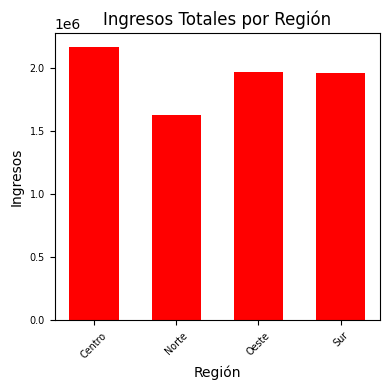

In [4]:
#  Calcular los ingresos totales por región

# Calcular los ingresos (Ventas * Precio)
df['Ingresos'] = df['Ventas'] * df['Precio']
ingresos_region = df.groupby('Region')['Ingresos'].sum()
# Crear una figura con un tamaño de 4x4
plt.figure(figsize=(4, 4))
plt.bar(ingresos_region.index, ingresos_region.values, 0.6, color='red')
plt.xticks(range(len(ingresos_region.index)), ingresos_region.index, rotation=45, ha="center", fontsize='x-small')
plt.yticks(fontsize="x-small")
plt.title('Ingresos Totales por Región')
plt.xlabel('Región')
plt.ylabel('Ingresos')
plt.tight_layout()  # Ajuste para que las etiquetas no se salgan
plt.show()

<a id="ventas-producto"></a>
## Ventas por Producto
Aquí se presenta la cantidad de ventas por producto y el precio total generado por cada uno.


In [5]:
#  Sumar las ventas por producto y calcular el precio total
df['Precio Total'] = df['Ventas'] * df['Precio']  # Crear una nueva columna para el precio total

# Agrupar por producto y sumar las ventas y el precio total
ventas_por_producto = df.groupby('Producto')['Ventas'].sum()
precio_total_por_producto = df.groupby('Producto')['Precio Total'].sum()

# Crear una tabla con los productos, ventas y precio total
tabla_productos_ventas_precio = pd.DataFrame({
    'Cantidad de Ventas': ventas_por_producto.values,
    'Precio Total': precio_total_por_producto.values
}, index=ventas_por_producto.index)

# Mostrar la tabla de ventas por producto y precio total
print("\nVentas por producto y precio total:")
print(tabla_productos_ventas_precio)


Ventas por producto y precio total:
                 Cantidad de Ventas  Precio Total
Producto                                         
Auto de Juguete               28222       1677231
Muñeca                        29424       1773392
Pelota                        33744       2130406
Rompecabezas                  35270       2146713


<a id="producto-mas-vendido"></a>
## Producto Más y Menos Vendido
En esta sección se muestran los juguetes más y menos vendidos según la cantidad de ventas.


In [6]:
#  Encontrar el juguete más vendido y el menos vendido
producto_mas_vendido = ventas_por_producto.idxmax()
ventas_mas_vendidas = ventas_por_producto.max()

producto_menos_vendido = ventas_por_producto.idxmin()
ventas_menos_vendidas = ventas_por_producto.min()

# Mostrar los resultados
print("\nJuguete más vendido:")
print(f"{producto_mas_vendido} con {ventas_mas_vendidas} ventas")

print("\nJuguete menos vendido:")
print(f"{producto_menos_vendido} con {ventas_menos_vendidas} ventas")


Juguete más vendido:
Rompecabezas con 35270 ventas

Juguete menos vendido:
Auto de Juguete con 28222 ventas


<a id="porcentaje-productos"></a>
## Porcentaje de Ventas por Producto
Se visualiza el porcentaje de ventas por producto en un gráfico circular.



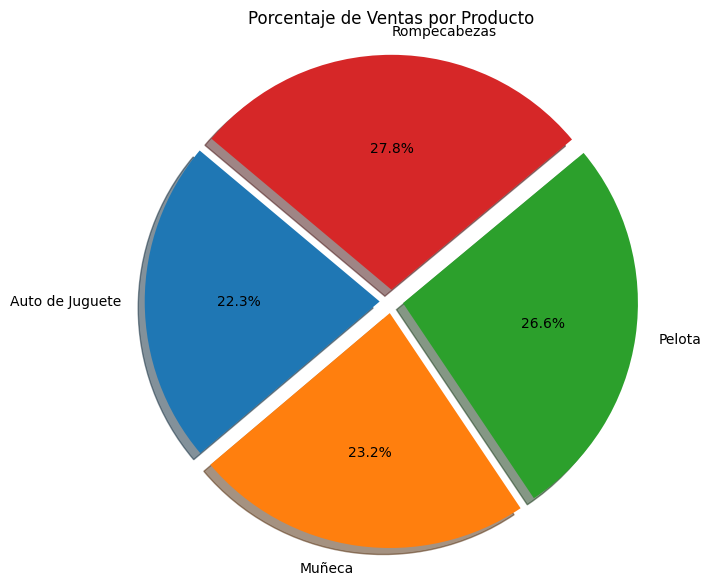

In [7]:
#  Calcular el porcentaje de ventas por producto
total_general = ventas_por_producto.sum()
porcentaje_productos = (ventas_por_producto / total_general) * 100

# Configuración del gráfico circular
productos = porcentaje_productos.index
porcentajes = porcentaje_productos.values
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Puedes agregar más colores si tienes más productos
explode = [0.05] * len(productos)  # Separa las secciones del gráfico ligeramente

# Crear la figura
plt.figure(figsize=(7, 7))

# Crear el gráfico circular
plt.pie(porcentajes, labels=productos, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors, shadow=True)

# Título del gráfico
plt.title('Porcentaje de Ventas por Producto')

# Ajustar el gráfico para que sea un círculo perfecto
plt.axis('equal')

# Mostrar el gráfico
plt.show()

<a id="ventas-mes"></a>
## Ventas por Mes
Se muestra una tabla con las ventas totales por mes y su respectiva visualización en una gráfica de líneas.


In [8]:

#  Calcular las ventas totales por mes
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.month
ventas_mensuales = df.groupby('Mes')['Ventas'].sum()

# Crear una tabla con los resultados
tabla_ventas_mensuales = pd.DataFrame({
    'Cantidad de Juguetes Vendidos': ventas_mensuales.values
}, index=ventas_mensuales.index)

# Indexar la tabla por el número del mes
tabla_ventas_mensuales.index.name = 'Mes'

# Mostrar la tabla
print("\033[1mVentas Totales por Mes:\033[0m")
print(tabla_ventas_mensuales)

Ventas Totales por Mes:
     Cantidad de Juguetes Vendidos
Mes                               
1                            16060
2                            14484
3                            15050
4                            14792
5                            12045
6                             7389
7                             7769
8                             7745
9                             7577
10                            9308
11                            6711
12                            7730


<a id="grafico-ventas-mensuales"></a>
## Gráfico de Ventas Mensuales
Este gráfico muestra las ventas totales por mes, representadas en una gráfica de líneas.


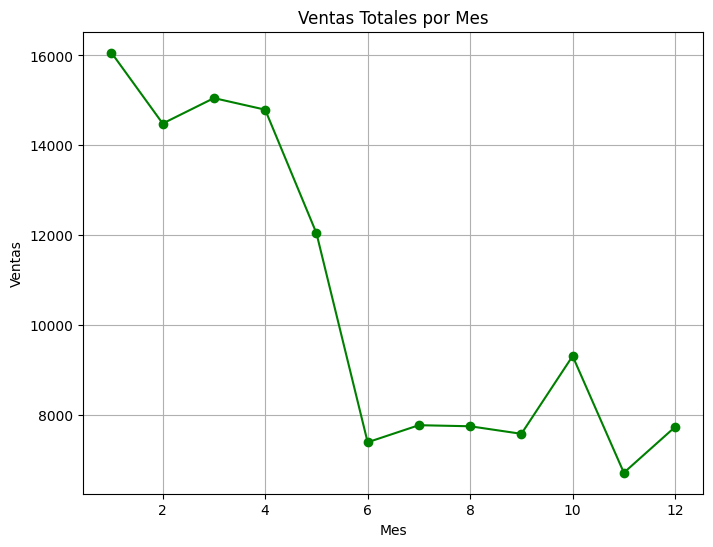

In [9]:
# Graficar las ventas mensuales
plt.figure(figsize=(8, 6))
ventas_mensuales.plot(kind='line', marker='o', title='Ventas Totales por Mes', color ='green')
plt.ylabel('Ventas')
plt.xlabel('Mes')
plt.grid(True)
plt.show()

<a id="promedio-ventas-producto"></a>
## Promedio de Ventas por Producto
Se muestra el promedio de ventas para cada producto.


In [10]:
#  Promedio de Ventas por Producto
promedio_ventas_por_producto = df.groupby('Producto')['Ventas'].mean()
print("\nPromedio de Ventas por Producto:")
print(promedio_ventas_por_producto)


Promedio de Ventas por Producto:
Producto
Auto de Juguete    241.213675
Muñeca             233.523810
Pelota             267.809524
Rompecabezas       269.236641
Name: Ventas, dtype: float64


<a id="desviacion-ventas-region"></a>
## Desviación Estándar de Ventas por Región
Aquí se calcula la desviación estándar de las ventas por región.


In [11]:
#  Desviación Estándar de las Ventas por Región
desviacion_ventas_region = df.groupby('Region')['Ventas'].std()
print("\nDesviación Estándar de Ventas por Región:")
print(desviacion_ventas_region)


Desviación Estándar de Ventas por Región:
Region
Centro    138.618291
Norte     133.673572
Oeste     133.644164
Sur       146.211033
Name: Ventas, dtype: float64


<a id="ventas-acumuladas"></a>
## Ventas Acumuladas por Mes
Se muestra un gráfico que muestra la acumulación de ventas mes a mes.


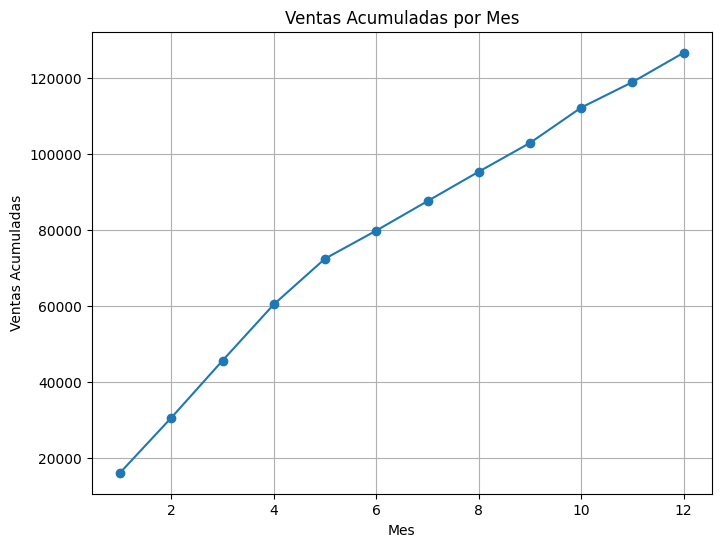

In [12]:
#  Ventas Acumuladas por Mes
ventas_acumuladas = ventas_mensuales.cumsum()
plt.figure(figsize=(8, 6))
ventas_acumuladas.plot(kind='line', marker='o', title='Ventas Acumuladas por Mes')
plt.ylabel('Ventas Acumuladas')
plt.xlabel('Mes')
plt.grid(True)
plt.show()

<a id="ventas-promedio-region"></a>
## Ventas Promedio por Región
En esta sección se muestra el promedio de ventas por región.


In [13]:
#  Ventas Promedio por Región
ventas_promedio_region = df.groupby('Region')['Ventas'].mean()
print("\nVentas Promedio por Región:")
print(ventas_promedio_region)


Ventas Promedio por Región:
Region
Centro    270.674242
Norte     239.557522
Oeste     248.409091
Sur       252.609756
Name: Ventas, dtype: float64


<a id="analisis-ventas-producto-region"></a>
## Análisis de Ventas por Producto y Región
Aquí se analiza las ventas por producto en cada región con un gráfico de barras apiladas.


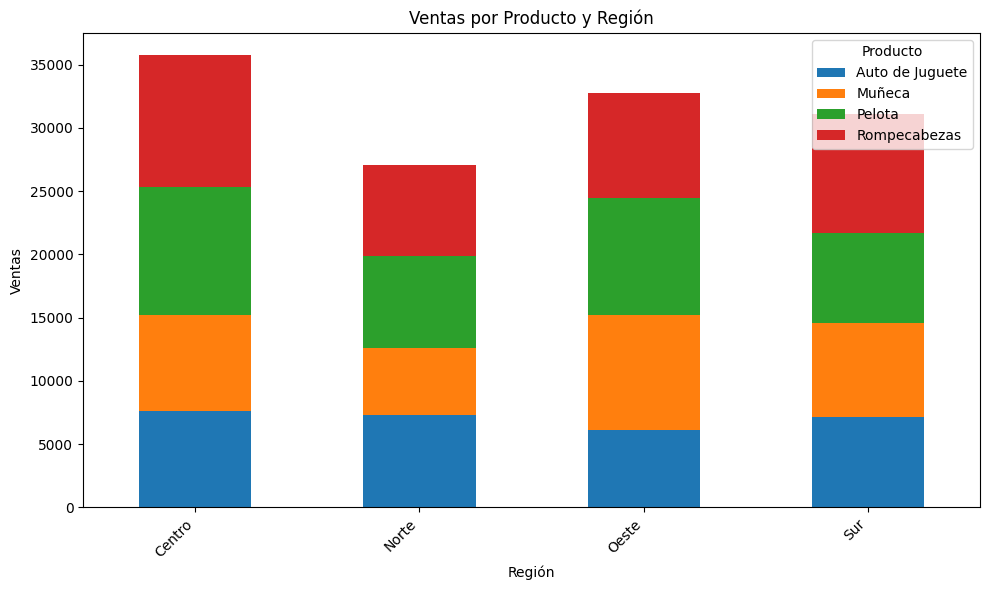

In [14]:
#  Análisis de Ventas por Producto y Región
ventas_por_producto_region = df.groupby(['Region', 'Producto'])['Ventas'].sum().unstack()

# Crear un gráfico de barras apiladas
ventas_por_producto_region.plot(kind='bar', stacked=True, figsize=(10, 6), title='Ventas por Producto y Región')
plt.ylabel('Ventas')
plt.xlabel('Región')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<a id="tendencia-precios-mes"></a>
## Tendencia de Precios por Mes
En esta sección se muestra la tendencia de precios promedio de los productos a lo largo de los meses.


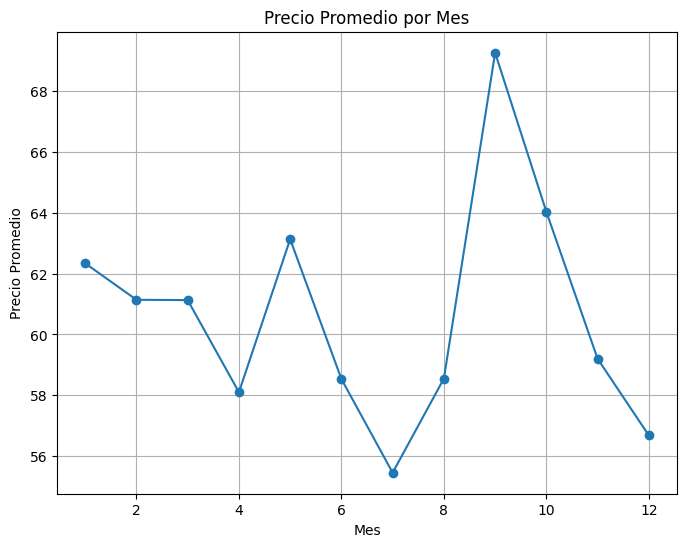

In [15]:
#  Tendencia de Precios por Mes
precio_promedio_mes = df.groupby('Mes')['Precio'].mean()
plt.figure(figsize=(8, 6))
precio_promedio_mes.plot(kind='line', marker='o', title='Precio Promedio por Mes')
plt.ylabel('Precio Promedio')
plt.xlabel('Mes')
plt.grid(True)
plt.show()

<a id="distribucion-ventas-precio"></a>
## Distribución de Ventas por Rango de Precio
Se visualiza la cantidad de ventas distribuidas por rango de precio, mostrando un gráfico de barras.


/tmp/ipykernel_15176/2347410776.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_por_rango_precio = df.groupby('Rango de Precio')['Ventas'].sum()


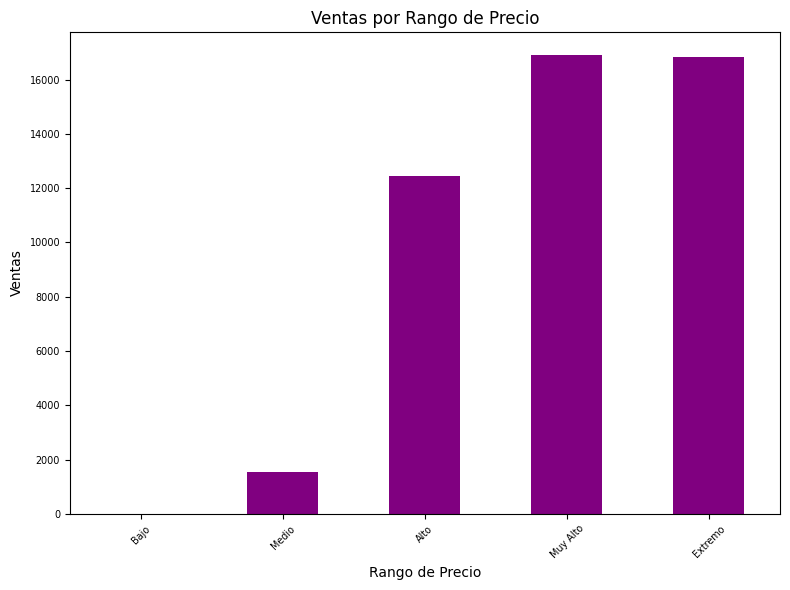

In [16]:
#  Distribución de Ventas por Rango de Precio
bins = [0, 10, 20, 30, 40, 50]
labels = ['Bajo', 'Medio', 'Alto', 'Muy Alto', 'Extremo']
df['Rango de Precio'] = pd.cut(df['Precio'], bins=bins, labels=labels)

ventas_por_rango_precio = df.groupby('Rango de Precio')['Ventas'].sum()

plt.figure(figsize=(8, 6))
ventas_por_rango_precio.plot(kind='bar', color='purple', title='Ventas por Rango de Precio')
plt.ylabel('Ventas')
plt.xlabel('Rango de Precio')
plt.xticks(rotation=45, ha='center', fontsize='x-small')
plt.yticks(fontsize="x-small")
plt.tight_layout()
plt.show()